# **자비스앤빌런즈 고객 DB로 데이터 분석**
## **1. 서문**
**1) 자비스앤빌런즈는?**  
1. 회사의 세무업무를 대행해주고 경리업무를 지원하는 '자비스'
2. 세금 환금 플랫폼인 '삼쩜삼'  

이렇게 2가지로 나눠진다.

**2) 본 프로젝트에 대하여**  
자비스앤빌런즈에서 제공한 데이터는 환급금 컬럼이 있는것으로 봐서 '삼쩜삼' 데이터로 추측할 수 있다. 이 데이터를 이용하여  
1. 고객의 결제여부에 영향을 미치는 요인들은 무엇인가?  
2. 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까?  

2가지를 확인해 보고자 한다.



## **2. EDA 및 데이터 전처리**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'NanumGothicCoding' 
import seaborn as sns

In [2]:
df = pd.read_csv('./Jobis_3o3.csv')
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


In [3]:
# 전체 데이터 정보확인. 3가지 수입정보에서 NaN값이 많이 보인다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [4]:
# 수입이 NaN이라는 것은 '없다'는 말과 같다고 볼 수있다. 따라서 결측값을 모두 0으로 바꾼다.
df = df.fillna('0')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  100000 non-null  object 
 7   income_사업  100000 non-null  object 
 8   income_기타  100000 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 6.2+ MB


In [5]:
# 3가지 수입의 데이터 타입을 계산 가능하도록 int로 변경한다. 
df['income_근로']=df['income_근로'].astype('int64')
df['income_사업']=df['income_사업'].astype('int64')
df['income_기타']=df['income_기타'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  100000 non-null  int64  
 7   income_사업  100000 non-null  int64  
 8   income_기타  100000 non-null  int64  
dtypes: bool(1), float64(3), int64(4), object(1)
memory usage: 6.2+ MB


In [6]:
# 10만개의 전체 데이터 통계. 
df.describe().iloc[1:]

,age,year,refund,fee,income_근로,income_사업,income_기타
mean,29.00096,2018.111300,2.081422e+05,7247.641000,2.623921e+06,1.182567e+06,1.607252e+05
std,7.76819,1.495812,3.071744e+05,11926.896979,5.260655e+06,2.254789e+06,7.958761e+05
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.00000,2017.000000,3.300000e+04,400.000000,0.000000e+00,3.100000e+04,0.000000e+00
50%,27.00000,2018.000000,9.900000e+04,4300.000000,0.000000e+00,3.280000e+05,0.000000e+00
75%,31.00000,2019.000000,2.540000e+05,8500.000000,2.994000e+06,1.235000e+06,2.000000e+03
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.823350e+08,3.993400e+07,6.281000e+07


데이터 통계자료를 봤을 때 전체적으로 편차가 심해 평균 데이터는 유용하지 않다.  
단, 나이는 어린 사용자가 많아 보이고, refund 컬럼에서는 마이너스 값도 나오는것이 확인된다.  
마지막으로 결제를 한 사람과 그렇지 않은 사람의 수를 확인해보자.

In [7]:
# 전체 데이터에서 결제를 한 사람수의 비율
print('결제를 한 사람 수: {}명'.format(df[df['has_paid'] == True]['has_paid'].count()))
print('결제를 하지 않은 사람 수: {}명'.format(df[df['has_paid'] == False]['has_paid'].count()))

결제를 한 사람 수: 64643명
결제를 하지 않은 사람 수: 35357명


## **3. 고객의 결제여부에 영향을 미치는 요인들은 무엇인가?**

### **1) 시각화를 통한 '결제여부' 컬럼과의 관계 확인**
결제여부와의 영향을 알아보기 위함이기 때문에 모든 컬럼을 has_paid 컬럼과 비교하여 관계를 확인한다.

**1. 나이와 결제여부 (age - has_paid)**  
나이는 10살 간격으로 나누었다.

In [8]:
age_df = df.copy()
age_df['section'] = ''

age_df['section'][age_df['age']<20] = '10대'
age_df['section'][(age_df['age']<30) & (age_df['age']>=20)] = '20대'
age_df['section'][(age_df['age']<40) & (age_df['age']>=30)] = '30대'
age_df['section'][(age_df['age']<50) & (age_df['age']>=40)] = '40대'
age_df['section'][(age_df['age']<60) & (age_df['age']>=50)] = '50대'
age_df['section'][(age_df['age']<70) & (age_df['age']>=60)] = '60대'
age_df['section'][age_df['age']>=70] = '70대이상'

age_df = pd.crosstab(age_df['section'], age_df['has_paid'])
age_df['합'] = age_df[0] + age_df[1]
age_df['결제비율(%)'] = round(age_df[1] / age_df['합'],3) * 100
age_df

has_paid,False,True,합,결제비율(%)
section,,,,
10대,393,886,1279,69.3
20대,23215,43762,66977,65.3
30대,8083,14099,22182,63.6
40대,2303,3604,5907,61.0
50대,1196,1927,3123,61.7
60대,158,329,487,67.6
70대이상,9,36,45,80.0


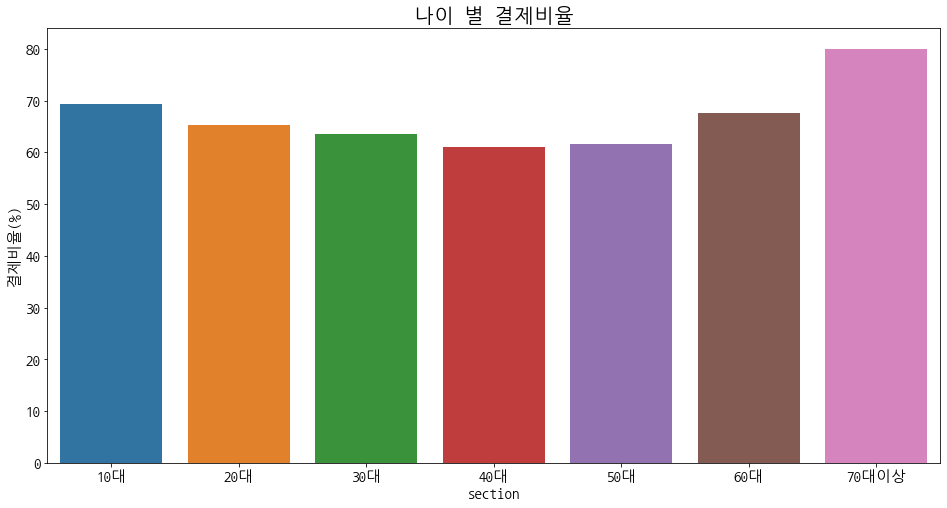

In [9]:
plt.figure(figsize=(16,8))
sns.barplot(data=age_df, x=age_df.index, y='결제비율(%)')
plt.title('나이 별 결제비율', fontsize=20);

- 10~40대까지는 결제율이 소폭 감소하다가 이후로는 증가한다.
- 하지만 70대를 제외한 모든 연령대에서 전체 결제율(약 65%)에 비슷한 수준이다.
- 70대는 독보적으로 비율이 높지만 의미를 두기엔 데이터 양이 굉장히 적다.
- 따라서 **나이별로 결제여부를 확인하는 것은 유의미하지 않다.**

**2. 성별과 결제여부 (gender - has_paid)**

In [10]:
gender_df = df.copy()
gender_df = pd.crosstab(gender_df['gender'], gender_df['has_paid'])
gender_df['합'] = gender_df[0] + gender_df[1]
gender_df['결제비율(%)'] = round(gender_df[1] / gender_df['합'],3) * 100
gender_df

has_paid,False,True,합,결제비율(%)
gender,,,,
-,18,4,22,18.2
F,18114,31387,49501,63.4
M,17225,33252,50477,65.9


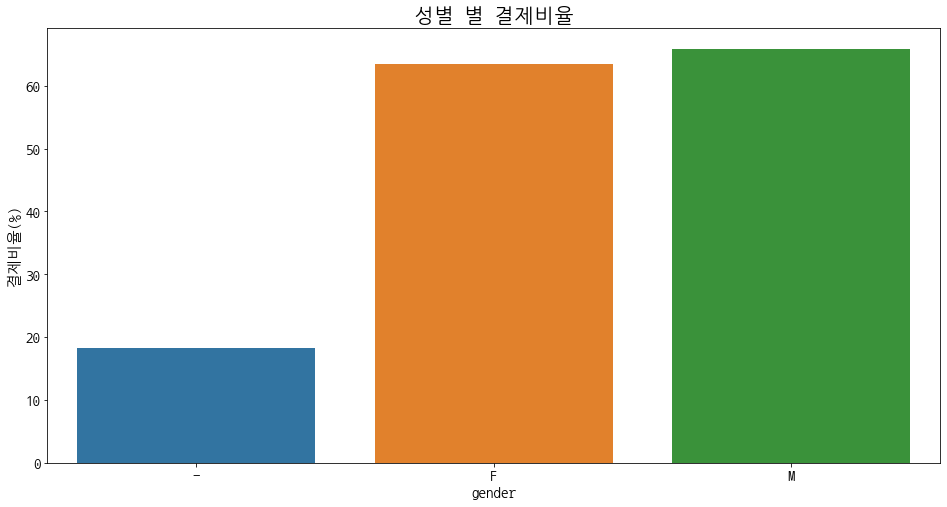

In [11]:
plt.figure(figsize=(16,8))
sns.barplot(data=gender_df, x=gender_df.index, y='결제비율(%)')
plt.title('성별 별 결제비율', fontsize=20);

- 잘못된 값 (-)이 들어가 있지만 그 갯수가 22개로 전체 결과에 영향이 없을정도로 굉장히 적으므로 무시해도 무방하다.
- 각 성별에 대한 결제비율이 비슷하므로 **성별로 확인하는 것은 유의미하지 않다.**

**3. 연도와 결제여부 (year - has_paid)**

In [12]:
year_df = df.copy()
year_df = pd.crosstab(year_df['year'], year_df['has_paid'])
year_df['합'] = year_df[0] + year_df[1]
year_df['결제비율(%)'] = round(year_df[1] / year_df['합'],3) * 100
year_df

has_paid,False,True,합,결제비율(%)
year,,,,
2015,1153,2832,3985,71.1
2016,4215,9698,13913,69.7
2017,5291,12204,17495,69.8
2018,6095,13888,19983,69.5
2019,6361,14481,20842,69.5
2020,12242,11540,23782,48.5


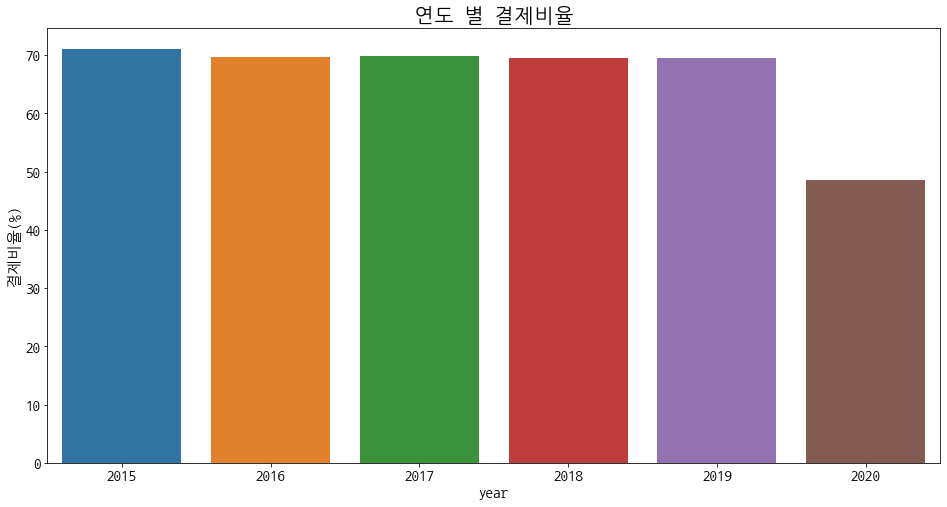

In [13]:
plt.figure(figsize=(16,8))
sns.barplot(data=year_df, x=year_df.index, y='결제비율(%)')
plt.title('연도 별 결제비율', fontsize=20);

- 2015년 부터 매해 70%정도의 사용자가 결제를 했지만 2020년에 결제비율이 50% 이하로 급감했다.
- 2020년에 결제율이 급락한 부분은 생각해볼 필요가 있다.

**4. 환급금액과 결제여부 (refund - has_paid)**  
환급금액의 간격은 최초 마이너스 금액부터 시작하여 2만원씩 구간을 나누었다.

In [14]:
# 환급금액은 높아질수록 결제비율이 높아진다.
refund_df = df.copy()
refund_df['section'] =''

refund_df['section'][refund_df['refund']<0] = '0 이하'
refund_df['section'][(refund_df['refund']<20000) & (refund_df['refund']>=0)] = '0~2'
refund_df['section'][(refund_df['refund']<40000) & (refund_df['refund']>=20000)] = '2~4'
refund_df['section'][(refund_df['refund']<60000) & (refund_df['refund']>=40000)] = '4~6'
refund_df['section'][(refund_df['refund']<80000) & (refund_df['refund']>=60000)] = '6~8'
refund_df['section'][(refund_df['refund']<100000) & (refund_df['refund']>=80000)] = '8~10'
refund_df['section'][(refund_df['refund']<120000) & (refund_df['refund']>=100000)] = '10~12'
refund_df['section'][(refund_df['refund']<140000) & (refund_df['refund']>=120000)] = '12~14'
refund_df['section'][(refund_df['refund']<160000) & (refund_df['refund']>=140000)] = '14~16'
refund_df['section'][(refund_df['refund']<180000) & (refund_df['refund']>=160000)] = '16~18'
refund_df['section'][(refund_df['refund']<200000) & (refund_df['refund']>=180000)] = '18~20'
refund_df['section'][(refund_df['refund']>=200000)] = '20이상'

refund_df = pd.crosstab(refund_df['section'], refund_df['has_paid'])
refund_df['합'] = refund_df[0] + refund_df[1]
refund_df['결제비율(%)'] = round(refund_df[1] / refund_df['합'],3) * 100
refund_df


has_paid,False,True,합,결제비율(%)
section,,,,
0 이하,8,7,15,46.7
0~2,7014,9889,16903,58.5
10~12,1519,3223,4742,68.0
12~14,1319,2625,3944,66.6
14~16,1270,2577,3847,67.0
16~18,1011,2151,3162,68.0
18~20,891,1839,2730,67.4
20이상,12441,18873,31314,60.3
2~4,3557,8371,11928,70.2


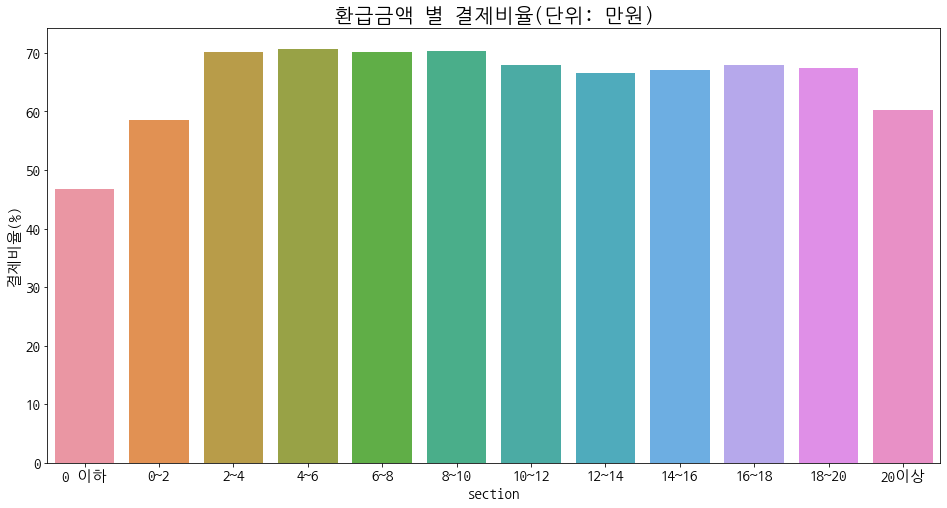

In [15]:
plt.figure(figsize=(16,8))
sns.barplot(data=refund_df, x=refund_df.index,
            order=['0 이하','0~2','2~4','4~6','6~8','8~10','10~12','12~14',
                '14~16','16~18','18~20','20이상'],
            y='결제비율(%)')
plt.title('환급금액 별 결제비율(단위: 만원)', fontsize=20);

- 환급금액이 적은 구간에서는 금액이 상승할수록 결제비율이 높아진다
- 하지만 2만원 이후로는 70% 내외를 유지하다가 10만원 이후로 소폭 하락한다.
- **환급금액은 미약하지만 결제여부와 관계가 조금은 있다고 볼 수 있다.**

**5. 수수료와 결제여부 (fee - has_paid)**  
수수료의 간격은 적은 구간에서만 2천원, 3천원 차이로 나누었고, 5천원 이후부터는 5천원 단위로 나누었다.

In [16]:
# 수수료는 높아질수록 결제 비율이 낮아졌다.
fee_df = df.copy()
fee_df['section'] = ''
fee_df['section'][fee_df['fee']<=1000] = '0.2이하'
fee_df['section'][(fee_df['fee']<5000) & (fee_df['fee']>1000)] = '0.2~0.5'
fee_df['section'][(fee_df['fee']<10000) & (fee_df['fee']>=5000)] = '0.5~1'
fee_df['section'][(fee_df['fee']<15000) & (fee_df['fee']>=10000)] = '1~1.5'
fee_df['section'][(fee_df['fee']<20000) & (fee_df['fee']>=15000)] = '1.5~2'
fee_df['section'][(fee_df['fee']<25000) & (fee_df['fee']>=20000)] = '2~2.5'
fee_df['section'][(fee_df['fee']<30000) & (fee_df['fee']>=25000)] = '2.5~3'
fee_df['section'][(fee_df['fee']<35000) & (fee_df['fee']>=30000)] = '3~3.5'
fee_df['section'][(fee_df['fee']<40000) & (fee_df['fee']>=35000)] = '3.5~4'
fee_df['section'][(fee_df['fee']<45000) & (fee_df['fee']>=40000)] = '4~4.5'
fee_df['section'][(fee_df['fee']<50000) & (fee_df['fee']>=45000)] = '4.5~5'
fee_df['section'][(fee_df['fee']<55000) & (fee_df['fee']>=50000)] = '5~5.5'
fee_df['section'][(fee_df['fee']<60000) & (fee_df['fee']>=55000)] = '5.5~6'
fee_df['section'][(fee_df['fee']<65000) & (fee_df['fee']>=60000)] = '6~6.5'
fee_df['section'][(fee_df['fee']<70000) & (fee_df['fee']>=65000)] = '6.5~7'
fee_df['section'][(fee_df['fee']<75000) & (fee_df['fee']>=70000)] = '7~7.5'
fee_df['section'][(fee_df['fee']<80000) & (fee_df['fee']>=75000)] = '7.5~8'
fee_df['section'][(fee_df['fee']<85000) & (fee_df['fee']>=80000)] = '8~8.5'
fee_df['section'][(fee_df['fee']<90000) & (fee_df['fee']>=85000)] = '8.5~9'
fee_df['section'][(fee_df['fee']<95000) & (fee_df['fee']>=90000)] = '9~9.5'
fee_df['section'][(fee_df['fee']<100000) & (fee_df['fee']>=95000)] = '9.5~10'
fee_df['section'][(fee_df['fee']>=100000)] = '10이상'

fee_df = pd.crosstab(fee_df['section'], fee_df['has_paid'])
fee_df['합'] = fee_df[0] + fee_df[1]
fee_df['결제비율(%)'] = round(fee_df[1] / fee_df['합'],3) * 100
fee_df

has_paid,False,True,합,결제비율(%)
section,,,,
0.2~0.5,6296,15228,21524,70.7
0.2이하,13660,26201,39861,65.7
0.5~1,5728,11076,16804,65.9
1.5~2,1335,1457,2792,52.2
10이상,131,30,161,18.6
1~1.5,2910,5630,8540,65.9
2.5~3,1194,1192,2386,50.0
2~2.5,1502,1749,3251,53.8
3.5~4,531,402,933,43.1


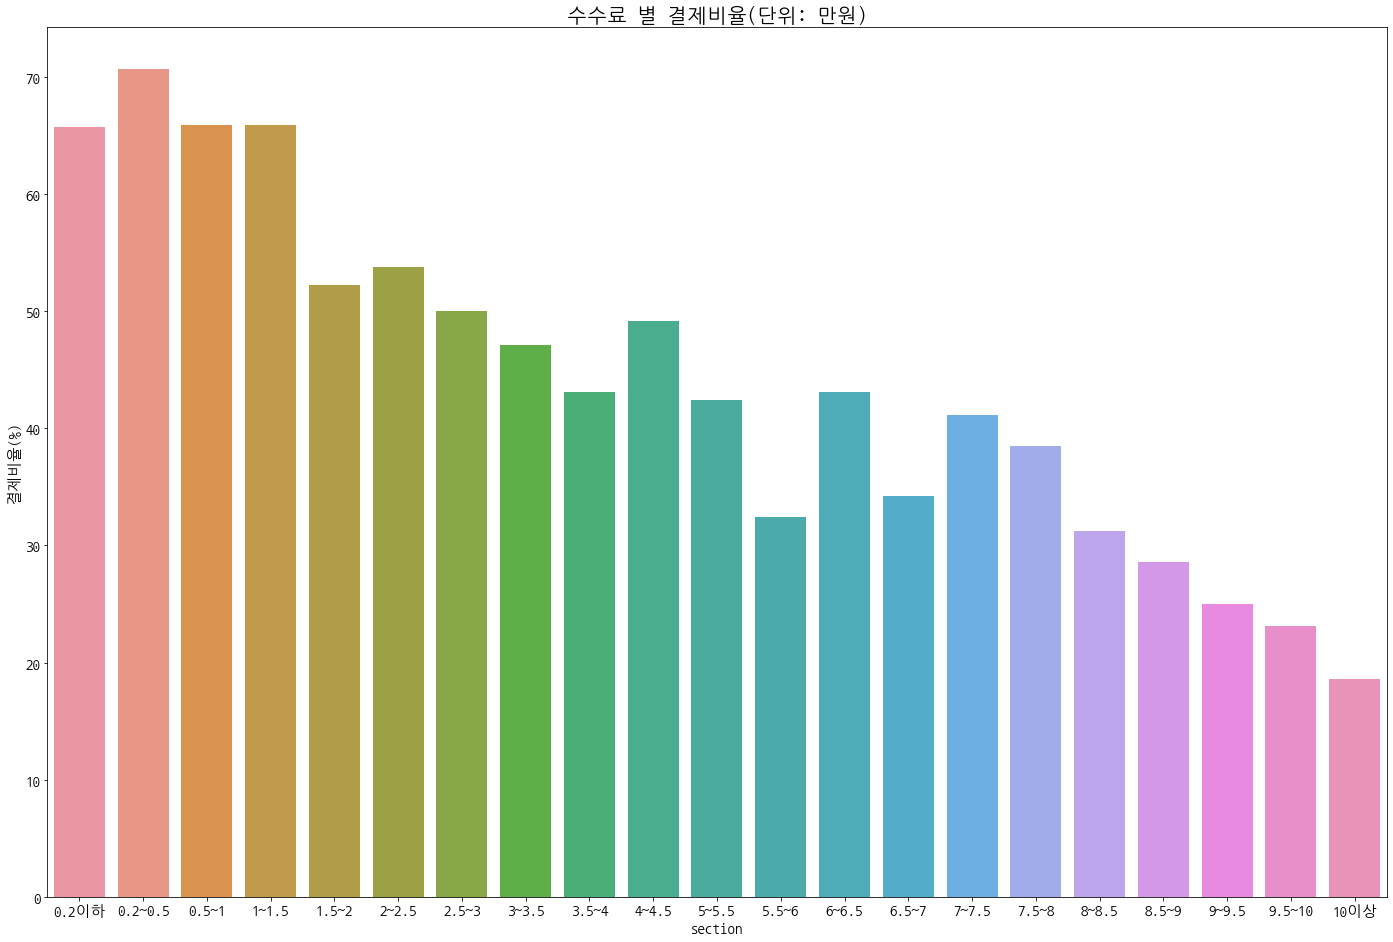

In [17]:
plt.figure(figsize=(24,16))
sns.barplot(data=fee_df, x=fee_df.index,
            order=['0.2이하','0.2~0.5','0.5~1','1~1.5','1.5~2','2~2.5','2.5~3','3~3.5',
                    '3.5~4','4~4.5','5~5.5','5.5~6','6~6.5','6.5~7','7~7.5','7.5~8',
                    '8~8.5','8.5~9','9~9.5','9.5~10','10이상'],
            y='결제비율(%)')
plt.title('수수료 별 결제비율(단위: 만원)', fontsize=20);

- 수수료가 올라가도 결제비율이 일정 수준을 유지하다가 1.5만원을 기점으로 급격하게 하락한다.
- 그 이후로도 수수료가 상승할수록 결제비율은 내려가는 그래프의 형태이다.
- **수수료는 결제여부와 관련이 있다고 볼 수 있다.**

**6. 근로소득과 결제여부 (income_근로 - has_paid)**  
근로소득의 간격은 최초 0원에서 시작하여 10만원, 그 이후로는 10배씩의 구간으로 나누었다.

In [18]:
incomeW_df = df.copy()
incomeW_df['section'] = ''

incomeW_df['section'][(incomeW_df['income_근로']==0)] = '0원'
incomeW_df['section'][(incomeW_df['income_근로']<100000) & (incomeW_df['income_근로']>0)] = '0~10만'
incomeW_df['section'][(incomeW_df['income_근로']<1000000) & (incomeW_df['income_근로']>=100000)] = '10만~100만'
incomeW_df['section'][(incomeW_df['income_근로']<10000000) & (incomeW_df['income_근로']>=1000000)] = '100만~1000만'
incomeW_df['section'][(incomeW_df['income_근로']<100000000) & (incomeW_df['income_근로']>=10000000)] = '1000만~1억'
incomeW_df['section'][(incomeW_df['income_근로']>=100000000)] = '1억이상'

incomeW_df = pd.crosstab(incomeW_df['section'], incomeW_df['has_paid'])

incomeW_df['합'] = incomeW_df[0] + incomeW_df[1]
incomeW_df['결제비율(%)'] = round(incomeW_df[1] / incomeW_df['합'],3) * 100
incomeW_df

has_paid,False,True,합,결제비율(%)
section,,,,
0~10만,159,404,563,71.8
0원,23370,36738,60108,61.1
1000만~1억,2894,6086,8980,67.8
100만~1000만,7286,17551,24837,70.7
10만~100만,1646,3859,5505,70.1
1억이상,2,5,7,71.4


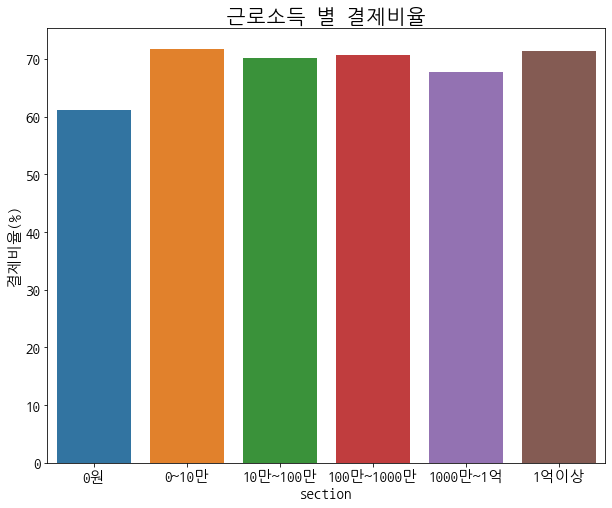

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(data=incomeW_df, x=incomeW_df.index, 
            order=['0원','0~10만','10만~100만','100만~1000만','1000만~1억','1억이상'],
            y='결제비율(%)')
plt.title('근로소득 별 결제비율', fontsize=20);

- 근로소득으로 분류했을 때 0원을 제외한 모든 분류에서 70%정도 결제비율을 기록하고 있다.
- 근로소득이 없던 사람이 상대적으로 적은 비율이지만 전체 결제율과 비슷한 60%정도를 기록했다.
- **근로소득은 결제여부와 관련이 없다고 할 수 있다.**

**7. 사업소득과 결제여부 (income_사업 - has_paid)**  
사업소득의 간격은 최초 0원에서 시작하여 10만원, 그 이후로는 10배의 절반의 구간으로 나누었다.

In [20]:
incomeB_df = df.copy()
incomeB_df['section'] = ''

incomeB_df['section'][incomeB_df['income_사업'] == 0] = '0원'
incomeB_df['section'][(incomeB_df['income_사업']<100000) & (incomeB_df['income_사업']>0)] = '0~10만'
incomeB_df['section'][(incomeB_df['income_사업']<500000) & (incomeB_df['income_사업']>=100000)] = '10만~50만'
incomeB_df['section'][(incomeB_df['income_사업']<1000000) & (incomeB_df['income_사업']>=500000)] = '50만~100만'
incomeB_df['section'][(incomeB_df['income_사업']<5000000) & (incomeB_df['income_사업']>=1000000)] = '100만~500만'
incomeB_df['section'][(incomeB_df['income_사업']<10000000) & (incomeB_df['income_사업']>=5000000)] = '500만~1000만'
incomeB_df['section'][(incomeB_df['income_사업']>=10000000)] = '1000만이상'

incomeB_df = pd.crosstab(incomeB_df['section'], incomeB_df['has_paid'])

incomeB_df['합'] = incomeB_df[0] + incomeB_df[1]
incomeB_df['결제비율(%)'] = round(incomeB_df[1] / incomeB_df['합'],3) * 100
incomeB_df

has_paid,False,True,합,결제비율(%)
section,,,,
0~10만,4654,8269,12923,64.0
0원,12636,9194,21830,42.1
1000만이상,763,715,1478,48.4
100만~500만,7022,16198,23220,69.8
10만~50만,5147,17188,22335,77.0
500만~1000만,1837,2735,4572,59.8
50만~100만,3298,10344,13642,75.8


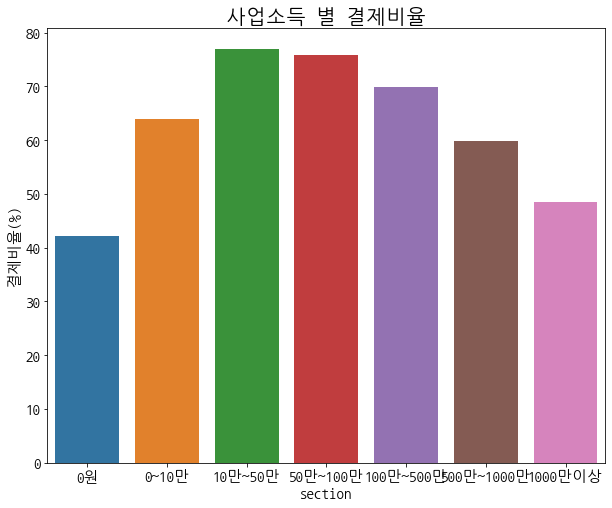

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(data=incomeB_df, x=incomeB_df.index, 
            order=['0원','0~10만','10만~50만','50만~100만','100만~500만','500만~1000만','1000만이상'],
            y='결제비율(%)')
plt.title('사업소득 별 결제비율', fontsize=20);

- 사업소득이 올라가면서 결제비율이 대폭 상승했다.
- 하지만 100만원을 기점으로 그 이상에서 하락한다.
- **사업소득과 결제여부와 어느정도 관련이 있다고 볼 수 있다.**

**8. 기타소득과 결제여부 (income_기타 - has_paid)**  
기타소득의 간격은 사업소득과 마찬가지로 최초 0원에서 시작하여 10만원, 그 이후로는 10배의 절반의 구간으로 나누었다.

In [22]:
incomeE_df = df.copy()
incomeE_df['section'] = ''

incomeE_df['section'][incomeE_df['income_기타'] == 0] = '0원'
incomeE_df['section'][(incomeE_df['income_기타']<100000) & (incomeE_df['income_기타']>0)] = '0~10만'
incomeE_df['section'][(incomeE_df['income_기타']<500000) & (incomeE_df['income_기타']>=100000)] = '10만~50만'
incomeE_df['section'][(incomeE_df['income_기타']<1000000) & (incomeE_df['income_기타']>=500000)] = '50만~100만'
incomeE_df['section'][(incomeE_df['income_기타']<5000000) & (incomeE_df['income_기타']>=1000000)] = '100만~500만'
incomeE_df['section'][(incomeE_df['income_기타']<10000000) & (incomeE_df['income_기타']>=5000000)] = '500만~1000만'
incomeE_df['section'][(incomeE_df['income_기타']>=10000000)] = '1000만이상'

incomeE_df = pd.crosstab(incomeE_df['section'], incomeE_df['has_paid'])
incomeE_df['합'] = incomeE_df[0] + incomeE_df[1]
incomeE_df['결제비율(%)'] = round(incomeE_df[1] / incomeE_df['합'],3) * 100
incomeE_df

has_paid,False,True,합,결제비율(%)
section,,,,
0~10만,2388,5296,7684,68.9
0원,26828,48060,74888,64.2
1000만이상,64,34,98,34.7
100만~500만,1480,1920,3400,56.5
10만~50만,3238,7039,10277,68.5
500만~1000만,230,124,354,35.0
50만~100만,1129,2170,3299,65.8


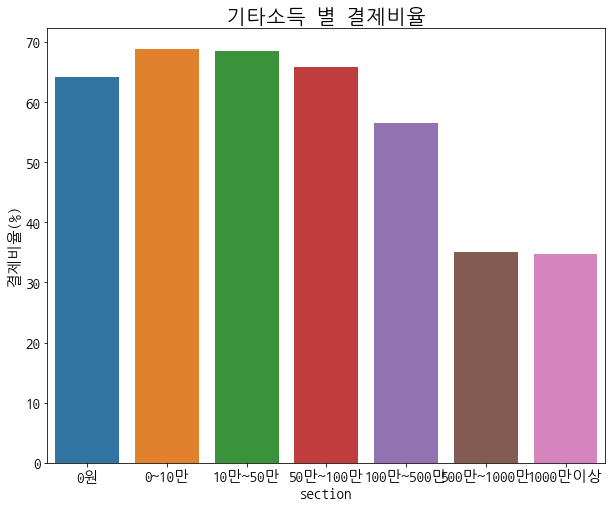

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(data=incomeE_df, x=incomeE_df.index,
            order=['0원','0~10만','10만~50만','50만~100만','100만~500만','500만~1000만','1000만이상'],
            y='결제비율(%)')
plt.title('기타소득 별 결제비율', fontsize=20);

- 기타소득은 낮은 금액에서 올라가더라도 결제비율이 일정 수준을 유지하다가 100만원을 기점으로 그 이상에서 급격하게 하락한다.
- **기타소득은 결제여부와 어느정도 관련이 있다고 볼 수 있다.**

**9. 연도별 데이터 확인**  
위 차트중 2020년에서 결제비율이 급감한 것을 확인했었다. 따라서 2020년의 데이터가 다른 해와 무엇이 다른지 확인해본다.

In [24]:
df.groupby('year').mean()

,age,refund,fee,has_paid,income_근로,income_사업,income_기타
year,,,,,,,
2015,30.748808,162656.210790,4396.461731,0.710665,4.291267e+05,7.168088e+05,32737.766625
2016,30.553511,171084.237763,5579.752749,0.697046,1.993295e+06,9.055580e+05,151482.714008
2017,29.636296,176735.467276,5852.214919,0.697571,2.125833e+06,9.553367e+05,150700.428694
2018,28.836261,179430.415853,5994.825602,0.694991,2.542636e+06,9.500879e+05,154357.203623
2019,28.228049,173935.226946,5831.383744,0.694799,3.115681e+06,8.984142e+05,135792.150465
2020,28.148179,314651.459087,12021.541502,0.485241,3.364365e+06,2.034195e+06,222154.402489


- 위 8개의 차트 자료중 수수료, 사업소득, 기타소득이 올라갈 때 결제 비율이 떨어지는 것을 확인했었다.
- 그런데 2020년은 다른해에 비해 환급금액, 수수료, 사업소득, 기타소득이 늘어났다.
- 특히 그 중에서도 수수료의 상승 비율이 가장 크다.

### **2) 정리**
- 위 자료를 확인해봤을때 결제여부와 가장 연관성이 있는것은 **수수료**라고 생각한다.
- 수수료 차트만 보아도 환급금액을 조회한 후 **수수료가 일정금액에서 비싸지면 결제하기를 꺼려했을 것**으로 예상할 수 있다.
- 무료배송을 위해 물건을 추가로 구매하거나 주차요금을 아끼기 위해 먼곳이더라도 무료주차장에 주차하는 것처럼 당장의 지출을 아까워하며 다른 방법을 찾는 심리가 여기서도 똑같이 적용했다고 볼 수 있다.

## **4. 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야할까?**

### **1) 수수료(fee)와 상관관계가 높은 컬럼으로 접근**

수수료와 모든 컬럼간의 상관관계를 확인해보자

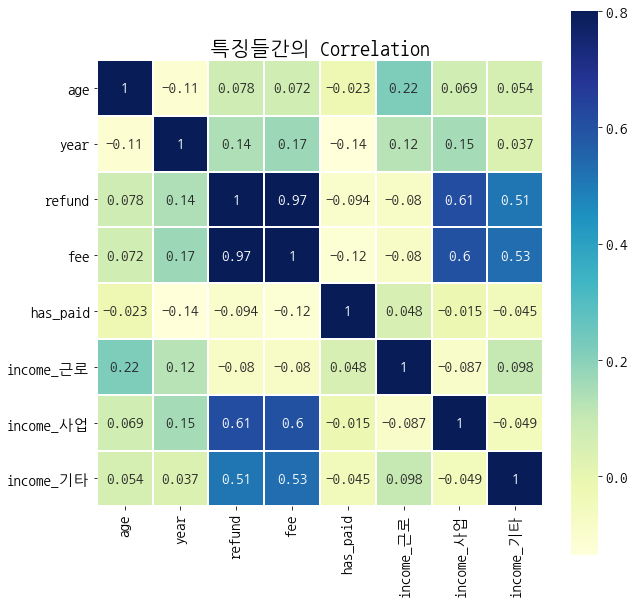

In [25]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu');
plt.title('특징들간의 Correlation', fontsize=20);

- 환급금액과 수수료는 굉장히 강한 양의 상관관계를 형성하고 있다.
- 또 이 두가지는 사업소득과 기타소득 두가지와 양의 상관관계를 형성하고 있다.
- 따라서 사업소득과 기타소득이 높으면 수수료도 높아진다고 말할 수 있다.  

=> ***사업소득과 기타소득이 높은 고객을 잡는다면 고액의 수수료를 확보하며, 회사수익을 늘릴 수 있다.***

**그렇다면 사업소득, 기타소득 중 하나의 타겟층을 제시해야 한다면 어느 고객을 타겟층으로 잡을것인가?**  
전체고객, 사업소득 일정금액 이상, 기타소득 일정금액 이상. 이렇게 3가지로 나누어서 평균적인 수수료를 알아보면서 어떤 고객층이 수수료가 더 많이 나오는지 확인해본다.

In [26]:
true_df = df[df['has_paid'] == True]
false_df = df[df['has_paid'] == False]
print('<전체 조회 고객>')
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(true_df.describe().loc['mean','fee'],1)))
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(false_df.describe().loc['mean','fee'],1)))

<전체 조회 고객>
결제한 사람의 전체 수수료 평균: 6209.5원
결제하지 않은 사람의 전체 수수료 평균: 9145.7원


In [27]:
Bhigh100_true_df = true_df[true_df['income_사업'] >= 1000000]
Bhigh100_false_df = false_df[false_df['income_사업'] >= 1000000]
Bhigh500_true_df = true_df[true_df['income_사업'] >= 5000000]
Bhigh500_false_df = false_df[false_df['income_사업'] >= 5000000]
Bhigh1000_true_df = true_df[true_df['income_사업'] >= 10000000]
Bhigh1000_false_df = false_df[false_df['income_사업'] >= 10000000]

print('<사업소득 100만원 이상 기준, 전체인원: {}>'. format(len(Bhigh100_true_df)+len(Bhigh100_false_df)))
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(Bhigh100_true_df.describe().loc['mean','fee'],1)))
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(Bhigh100_false_df.describe().loc['mean','fee'],1)))
print('\n<사업소득 500만원 이상 기준, 전체인원: {}>'. format(len(Bhigh500_true_df)+len(Bhigh500_false_df)))
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(Bhigh500_true_df.describe().loc['mean','fee'],1)))
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(Bhigh500_false_df.describe().loc['mean','fee'],1)))
print('\n<사업소득 1000만원 이상 기준, 전체인원: {}>'. format(len(Bhigh1000_true_df)+len(Bhigh1000_false_df)))
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(Bhigh1000_true_df.describe().loc['mean','fee'],1)))
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(Bhigh1000_false_df.describe().loc['mean','fee'],1)))

<사업소득 100만원 이상 기준, 전체인원: 29270>
결제한 사람의 전체 수수료 평균: 13873.1원
결제하지 않은 사람의 전체 수수료 평균: 19809.8원

<사업소득 500만원 이상 기준, 전체인원: 6050>
결제한 사람의 전체 수수료 평균: 28469.8원
결제하지 않은 사람의 전체 수수료 평균: 33906.2원

<사업소득 1000만원 이상 기준, 전체인원: 1478>
결제한 사람의 전체 수수료 평균: 40007.6원
결제하지 않은 사람의 전체 수수료 평균: 40863.6원


In [28]:
Ehigh100_true_df = true_df[true_df['income_기타'] >= 1000000]
Ehigh100_false_df = false_df[false_df['income_기타'] >= 1000000]
Ehigh500_true_df = true_df[true_df['income_기타'] >= 5000000]
Ehigh500_false_df = false_df[false_df['income_기타'] >= 5000000]
Ehigh1000_true_df = true_df[true_df['income_기타'] >= 10000000]
Ehigh1000_false_df = false_df[false_df['income_기타'] >= 10000000]

print('<기타소득 100만원 이상 기준, 전체인원: {}>'. format(len(Ehigh100_true_df)+len(Ehigh100_false_df)))
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(Ehigh100_true_df.describe().loc['mean','fee'],1))) 
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(Ehigh100_false_df.describe().loc['mean','fee'],1)))
print('\n<기타소득 500만원 이상 기준, 전체인원: {}>'. format(len(Ehigh500_true_df)+len(Ehigh500_false_df)))
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(Ehigh500_true_df.describe().loc['mean','fee'],1)))
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(Ehigh500_false_df.describe().loc['mean','fee'],1)))
print('\n<기타소득 1000만원 이상 기준, 전체인원: {}>'. format(len(Ehigh1000_true_df)+len(Ehigh1000_false_df)))
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(Ehigh1000_true_df.describe().loc['mean','fee'],1)))
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(Ehigh1000_false_df.describe().loc['mean','fee'],1)))

<기타소득 100만원 이상 기준, 전체인원: 3852>
결제한 사람의 전체 수수료 평균: 22678.9원
결제하지 않은 사람의 전체 수수료 평균: 39889.9원

<기타소득 500만원 이상 기준, 전체인원: 452>
결제한 사람의 전체 수수료 평균: 63083.5원
결제하지 않은 사람의 전체 수수료 평균: 95511.6원

<기타소득 1000만원 이상 기준, 전체인원: 98>
결제한 사람의 전체 수수료 평균: 112588.2원
결제하지 않은 사람의 전체 수수료 평균: 150345.3원


<위 데이터로 간단한 비교를 해보자>  
사업소득과 기타소득 각각 100만원 이상인 인원 중 10%가 추가적으로 더 결제를 한다면?
1. 사업소득  
    100만원 이상인 인원: 29270명  
    그 중 10% 인원: 2927명  
    결제하지 않은 고객의 수수료 평균: 19809.8원  
    **기대할 수 있는 수입: 약5798만원**  
  
2. 기타소득  
    100만원 이상인 인원: 3852명  
    그 중 10% 인원: 385.2명  
    결제하지 않은 고객의 수수료 평균: 39889.9원  
    **기대할 수 있는 수입: 약1537만원**

- 사업&기타소득 모두 고액으로 필터링 할수록 평균 수수료 금액이 상승.
- 사업소득에 비해 기타소득의 수수료가 2~4배정도 크지만, 해당하는 인원은 사업소득이 10배 정도의 차이로 더 많다.
- 위 비교를 봤을 때 결제하는 비율이 같이 증가되었을 때 기대되는 이익은 사업소득 쪽이 약 4배 정도 더 크다. 
- 따라서 기타소득보다 **사업소득이 높은 고객을 더 많이 잡는 것이 유리**하다고 본다.

이렇게 본다면 사업소득이 높은 고객을 타겟팅으로 해서 수수료결제의 합을 높이는 것을 기대할 수 있다.  
하지만 1번 문제에서 확인했듯이 **수수료가 높아지면 결제를 꺼려하는 경향**이 있기 때문에 이들을 결제까지 유도할 수 있는 방안이 필요하다.

### **2) 서비스를 조회하는 사람들의 특징으로 접근**  
어떤 사람들이 서비스 조회를 많이 했는지 3가지 수입의 데이터로 확인해본다.

In [29]:
check_df = df.copy()
check_df['income'] = ''
check_df['income'][(check_df['income_근로'] == 0) & (check_df['income_사업'] == 0) & (check_df['income_기타'] == 0)] = '근x사x기x'
check_df['income'][(check_df['income_근로'] != 0) & (check_df['income_사업'] == 0) & (check_df['income_기타'] == 0)] = '근o사x기x'
check_df['income'][(check_df['income_근로'] != 0) & (check_df['income_사업'] != 0) & (check_df['income_기타'] == 0)] = '근o사o기x'
check_df['income'][(check_df['income_근로'] != 0) & (check_df['income_사업'] != 0) & (check_df['income_기타'] != 0)] = '근o사o기o'
check_df['income'][(check_df['income_근로'] == 0) & (check_df['income_사업'] != 0) & (check_df['income_기타'] == 0)] = '근x사o기x'
check_df['income'][(check_df['income_근로'] == 0) & (check_df['income_사업'] != 0) & (check_df['income_기타'] != 0)] = '근x사o기o'
check_df['income'][(check_df['income_근로'] == 0) & (check_df['income_사업'] == 0) & (check_df['income_기타'] != 0)] = '근x사x기o'
check_df['income'][(check_df['income_근로'] != 0) & (check_df['income_사업'] == 0) & (check_df['income_기타'] != 0)] = '근o사x기o'
check_df['income'].value_counts()


근x사o기x    38432
근o사o기x    27132
근x사x기x     9226
근o사x기o     6992
근x사o기o     6936
근o사o기o     5670
근x사x기o     5514
근o사x기x       98
Name: income, dtype: int64

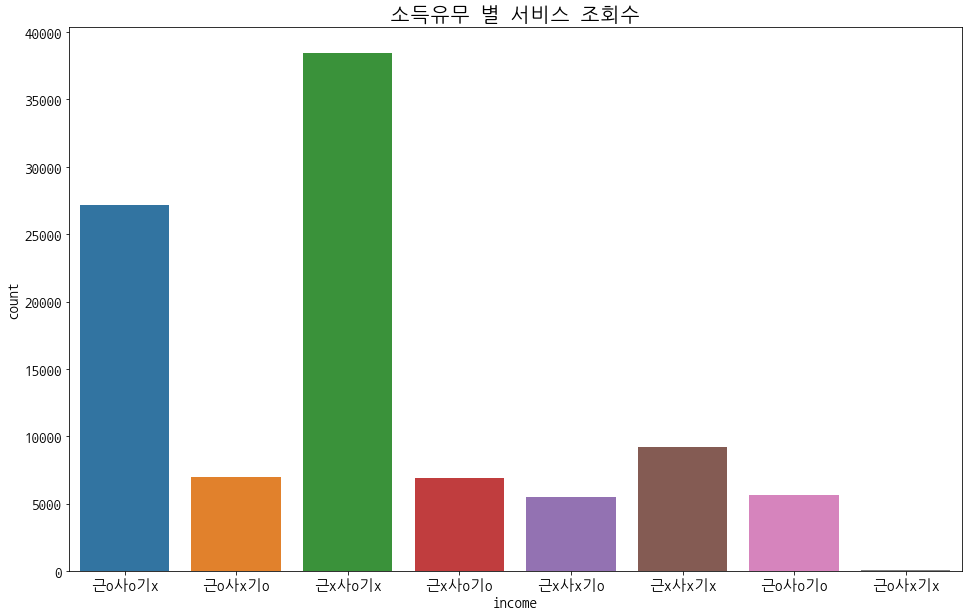

In [30]:
plt.figure(figsize=(16,10))
sns.countplot(data=check_df, x='income')
plt.title('소득유무 별 서비스 조회수', fontsize=20);

- 위 그래프를 통해 알 수 있듯이 최근 5년간 조회한 고객의 수입 내역을 봤을 때 '사업소득'이 있는 경우가 압도적으로 많았다.
- 실제로 '근로소득'은 대부분 연말정산으로 신고하고, '기타소득'은 그 케이스가 한정적이기 때문에 종합소득세 신고는 '사업소득'이 많다.
- 따라서 신규고객 유치를 위한 타겟팅을 한다면, **사업소득이 있는 사람**에게 하는 것이 마땅하다 생각한다.

### **3) 정리**
1. 사업소득이 높은 고객을 결제까지 유도한다면 높은 수수료 수익을 기대할 수 있다. 따라서 이에 해당하는 고객을 타겟층으로 설정하고 사업소득별로 구분을 짓고 차등하여 혜택을 주는 것을 제안한다.  
    예) 소득이 높아질 수록 수수료의 할인 비율을 높여준다.   
    사업소득 100만 ~ 500만 - 수수료 5% 감면,  
    사업소득 500만 ~ 1000만 - 수수료 7% 감면,  
    사업소득 1000만이상 - 수수료 10% 감면
2. 신규회원 유치를 위해 최초 결제 고객중 사업소득이 있는 고객을 타겟층으로 설정하고 프로모션 이벤트를 기획해 보는것을 제안한다.